1\. Write a function that converts number representation (bin<->dec<->hex)

In [1]:
def converter(i):
    s=int(i)
    i_bin=bin(s)
    i_hex=hex(s)
    print("Rappresentazione decimale: ", s)
    print("Rappresentazione binaria: ", i_bin)
    print("Rappresentazione esadecimale: ", i_hex)
        

x=66
converter(x)

Rappresentazione decimale:  66
Rappresentazione binaria:  0b1000010
Rappresentazione esadecimale:  0x42


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [2]:

def singprec(x):
    if len(x) != 32: print("Error! Input: string of 32 elements (0 or 1)")
    
    if int(x[0])==0: s=1
    elif int(x[0])==1: s=-1
    else: print("Error!")
    
    bin_e = x[1:9]
    exp = -127
    for i in range(0,8):
        exp += int(bin_e[7-i])*pow(2,i)
     
    
    bin_mant = x[9:32]
    mantissa = 1
    for i in range(0,23):
        mantissa += int(bin_mant[i])*pow(0.5,i+1)
    
    x_float = s*mantissa*pow(2,exp)
    return x_float


bits='00010110100001110110010000000111' #metto il numero come stringa
singprec(bits) 

2.1873552436300517e-25

3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [3]:
import sys
print (sys.float_info)


#max=1.7976931348623157e+308, min=2.2250738585072014e-308

a=1
b=1

i=1

while i>0:
    a=a*2
    b=b/2
    if a>1.7976931348623157e+308:
        print("Overflow!", a)
        break
    if b<2.2250738585072014e-308:
        print("Underflow!", b)
        break
    else: None
    
    i += 1



sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)
Underflow! 1.1125369292536007e-308


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [6]:
n=1

x=1
y=5


while (x != y):
    x = y + n
    n = n/2

print(n)
print(x)

2.220446049250313e-16
5.0


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [7]:
#a

import math as m

def formula(a, b, c):
    x_1=(-b+m.sqrt(b*b-4*a*c))/(2*a)
    x_2=(-b-m.sqrt(b*b-4*a*c))/(2*a)
    
    if (b*b-4*a*c)<0: print('Delta negativo!')
    else: return ('Le soluzioni sono: ', x_1, ' e ', x_2)

a=0.001
b=1000
c=0.001

formula(a, b, c)

('Le soluzioni sono: ', -9.999894245993346e-07, ' e ', -999999.999999)

In [8]:
#b: (a+b)(a-b)=a^2 - b^2

def formula(a, b, c):
    x_1=4*a*c/(-2*a*b-2*a*m.sqrt(b*b-4*a*c))
    x_2=4*a*c/(-2*a*b+2*a*m.sqrt(b*b-4*a*c))
    
    if (-2*a*b+2*a*m.sqrt(b*b-4*a*c))==0: print('Errore! Denominatore nullo')
    elif (b*b-4*a*c)<0: print('Delta negativo!')
    else: return ('Le soluzioni sono: ', x_1, ' e ', x_2)

a=0.001
b=1000
c=0.001

formula(a, b, c)

#Floats can only have a limited number of meaningful decimal places

('Le soluzioni sono: ', -1.0000000000009999e-06, ' e ', -1000022.1222095027)

In [26]:
#c
def truncate(number, decimals=0):
    
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer.")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more.")
    elif decimals == 0:
        return m.trunc(number)

    factor = 10.0 ** decimals
    return m.trunc(number * factor) / factor


def formula(a, b, c):

    a=truncate(a, 10)
    b=truncate(b, 10)
    c=truncate(c, 10)
    
    x_1=(-b+m.sqrt(b*b-4*a*c))/(2*a)
    x_2=(-b-m.sqrt(b*b-4*a*c))/(2*a)
    
    x_3=4*a*c/(-2*a*b-2*a*m.sqrt(b*b-4*a*c))
    x_4=4*a*c/(-2*a*b+2*a*m.sqrt(b*b-4*a*c))
    
    if (-2*a*b+2*a*m.sqrt(b*b-4*a*c))==0: print('Errore! Denominatore nullo')
    elif (b*b-4*a*c)<0: print('Delta negativo!')
    else:
        return 'La prima radice: ', x_1,  x_3, 'La seconda radice: ', x_2, x_4,
    
a=0.001
b=1000.0
c=0.001

formula(a, b, c)

('La prima radice: ',
 -9.999894245993346e-07,
 -1.0000000000009999e-06,
 'La seconda radice: ',
 -999999.999999,
 -1000022.1222095027)

6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

1.0009999999998895
[1.0009999999998895, 1.0000999999998899, 1.0000100000065513, 1.0000009999177333, 1.000000083740371, 1.000000083740371]


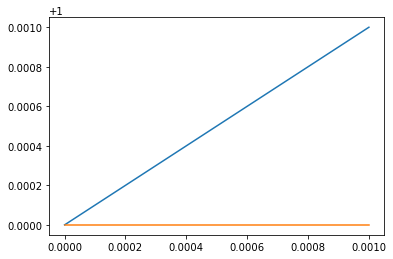

In [37]:
x=1

delta= 0.001

def function(x):
    f = x*(x-1)   
    return f


def derivative(x,function,delta):
    d = (function(x+delta)-function(x))/delta
    return d


print(derivative(x,function,delta))

delta2 = [0.001,0.0001,0.00001,0.000001,0.000000001,0.000000001]

der = [derivative(1,function,d) for d in delta2]

print(der)

analitically=[2*x-1 for d in delta2] #2x-1

import matplotlib.pyplot as plt

plt.plot(delta2, der)
plt.plot(delta2, analitically)

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [44]:
def func(x):
    f = m.sqrt(1-x*x) 
    return f

def integral(N):
    h = 2/N
    I = 0
    for k in range(N):
        I += h*func(k/N)        
    return I



print(integral(100))

%timeit integral(100)
print('difference:', abs((m.pi/2)-integral(100)) )

x = integral(1000000)

print(x)
%timeit integral(1000000)
print('difference:', abs((m.pi/2)-x) )


1.5802085158895236
82.4 µs ± 6.24 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
difference: 0.009412189094627044
1.5707973262069104
934 ms ± 186 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
difference: 9.994120138134832e-07
